## 1. Сгенерировать случайный набор двухмерных событий на неподвижной мишени с углом разлета треков 15°, расстоянием 1 между слоями детектора и точностью определения координаты хита 0.01. В детекторе 6 слоев, в событии 5 треков, в датасете 100 событий.



In [1]:
!pip install 'git+https://github.com/LAL/trackml-library@master#egg=trackml'

  Cloning https://github.com/LAL/trackml-library (to revision master) to /tmp/pip-install-nz354q2r/trackml_91573143397e4ffaa61d4346ce431f01
  Running command git clone --filter=blob:none --quiet https://github.com/LAL/trackml-library /tmp/pip-install-nz354q2r/trackml_91573143397e4ffaa61d4346ce431f01
  Resolved https://github.com/LAL/trackml-library to commit 53a165e15a2c885f54c2bef1bd1ed53db6ed9648
  Preparing metadata (setup.py) ... done
  Created wheel for trackml: filename=trackml-3-py2.py3-none-any.whl size=13500 sha256=20defe571aea943d298e6cec640ee7827fa39a9191eaa23c69fa5d4fe6f75f00
  Stored in directory: /tmp/pip-ephem-wheel-cache-x0e5qwmp/wheels/ba/5b/12/14ebc487d5056967e435b7709669dbffb633424e6c39d5a827
Successfully built trackml


In [9]:
import numpy as np
from scipy.stats import uniform, norm

SCATTER_ANGLE = 15 * np.pi / 180  # угол разлета треков
HIT_Y_ERROR = 0.01                # точность определения координаты хита
N_LAYERS = 6                      # число слоев в детекторе

angle_dist = uniform(-SCATTER_ANGLE, 2*SCATTER_ANGLE)
detector_z = 1.0 + np.arange(N_LAYERS)
dy_dist = norm(scale=HIT_Y_ERROR)

In [10]:
import pandas as pd
rng = np.random.default_rng()

In [25]:
def gen_track(angle):
  df = pd.DataFrame({
    'z': detector_z
  })
  df['y'] = np.tan(angle) * df.z + dy_dist.rvs(N_LAYERS, rng)
  df.index.rename('layer', inplace=True)
  return df

gen_track(np.pi / 4)

,z,y
layer,,
0,1.0,1.000745
1,2.0,1.983236
2,3.0,3.005618
3,4.0,4.001089
4,5.0,4.984489
5,6.0,5.994878


In [27]:
def gen_event(n_tracks):
  df = pd.DataFrame({'track_angle': angle_dist.rvs(n_tracks, rng)})
  df['particle_id'] = df.index
  df = df.groupby('particle_id').apply(lambda row: gen_track(row.track_angle.iloc[0]))
  df['weight'] = 1
  df.reset_index(inplace=True)
  df['hit_id'] = df.index
  return df

gen_event(1)

,particle_id,layer,z,y,weight,hit_id
0,0,0,1.0,0.055649,1,0
1,0,1,2.0,0.094247,1,1
2,0,2,3.0,0.160246,1,2
3,0,3,4.0,0.211376,1,3
4,0,4,5.0,0.247925,1,4
5,0,5,6.0,0.319052,1,5


In [31]:
def gen_dataset(n_events, n_tracks):
  result = []
  for event_id in range(n_events):
    event = gen_event(n_tracks)
    event['event_id'] = event_id
    result.append(event)
  return pd.concat(result).reset_index(drop=True)

df = gen_dataset(100, 5)  # 100 событий по 5 треков

In [32]:
df

,particle_id,layer,z,y,weight,hit_id,event_id
0,0,0,1.0,0.021008,1,0,0
1,0,1,2.0,0.073489,1,1,0
2,0,2,3.0,0.107954,1,2,0
3,0,3,4.0,0.149185,1,3,0
4,0,4,5.0,0.171191,1,4,0
...,...,...,...,...,...,...,...
2995,4,1,2.0,-0.030076,1,25,99
2996,4,2,3.0,-0.048657,1,26,99
2997,4,3,4.0,-0.054478,1,27,99
2998,4,4,5.0,-0.039384,1,28,99


## 2. Перейти в полярные координаты r, ϕ.

<Axes: xlabel='z', ylabel='y'>

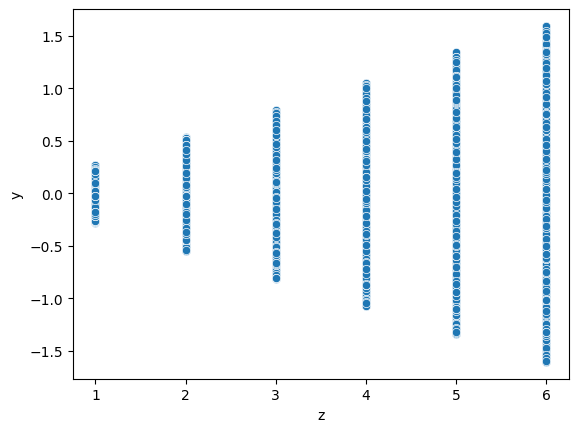

In [33]:
import seaborn as sns
sns.scatterplot(data=df, x='z', y='y')

<Axes: xlabel='z', ylabel='phi'>

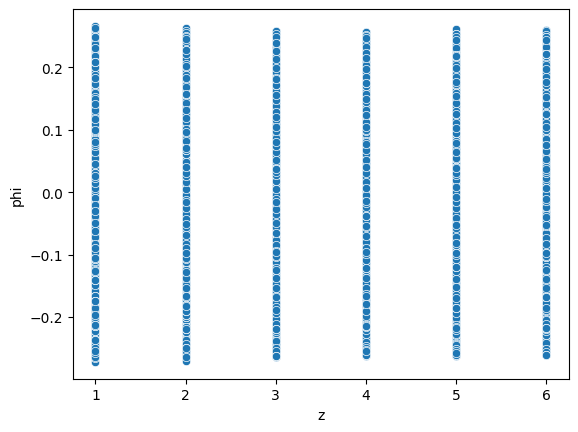

In [34]:
df['r'] = np.sqrt(df.z**2 + df.y**2)
df['phi'] = np.arctan2(df.y, df.z)
sns.scatterplot(data=df, x='z', y='phi')

In [35]:
df

,particle_id,layer,z,y,weight,hit_id,event_id,r,phi
0,0,0,1.0,0.021008,1,0,0,1.000221,0.021005
1,0,1,2.0,0.073489,1,1,0,2.001350,0.036728
2,0,2,3.0,0.107954,1,2,0,3.001942,0.035969
3,0,3,4.0,0.149185,1,3,0,4.002781,0.037279
4,0,4,5.0,0.171191,1,4,0,5.002930,0.034225
...,...,...,...,...,...,...,...,...,...
2995,4,1,2.0,-0.030076,1,25,99,2.000226,-0.015037
2996,4,2,3.0,-0.048657,1,26,99,3.000395,-0.016218
2997,4,3,4.0,-0.054478,1,27,99,4.000371,-0.013619
2998,4,4,5.0,-0.039384,1,28,99,5.000155,-0.007877


In [68]:
df.head(10)

,particle_id,layer,z,y,weight,hit_id,event_id,r,phi
0,0,0,1.0,0.021008,1,0,0,1.000221,0.021005
1,0,1,2.0,0.073489,1,1,0,2.001350,0.036728
2,0,2,3.0,0.107954,1,2,0,3.001942,0.035969
3,0,3,4.0,0.149185,1,3,0,4.002781,0.037279
4,0,4,5.0,0.171191,1,4,0,5.002930,0.034225
5,0,5,6.0,0.217010,1,5,0,6.003923,0.036153
6,1,0,1.0,0.078959,1,6,0,1.003112,0.078796
7,1,1,2.0,0.161529,1,7,0,2.006512,0.080590
8,1,2,3.0,0.252633,1,8,0,3.010618,0.084013
9,1,3,4.0,0.321467,1,9,0,4.012897,0.080194


## 3. Провести кластеризацию методом AffinityPropagation (по углу ϕ) для каждого события

<Axes: >

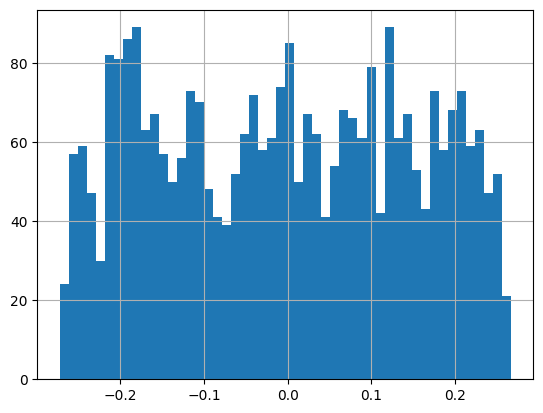

In [36]:
df.phi.hist(bins=50)

In [86]:
from sklearn.cluster import AffinityPropagation

track_id = np.array([])  # ndarray кластеров для всего датасета

af = AffinityPropagation(damping=0.5, max_iter=200)

for i in range(0,100):  #  i - id события
    selected_event = df.loc[df['event_id'] == i]

    x_train = selected_event['phi'].to_numpy()

    af.fit_predict(x_train.reshape(-1, 1))

    #af = AffinityPropagation().fit(selected_event[['r', 'phi']])
    track_id = np.concatenate((track_id, af.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Af

In [89]:
track_id

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
len(track_id)

3000

In [90]:
df = df.assign(track_id=track_id)
df

,particle_id,layer,z,y,weight,hit_id,event_id,r,phi,track_id
0,0,0,1.0,0.021008,1,0,0,1.000221,0.021005,0.0
1,0,1,2.0,0.073489,1,1,0,2.001350,0.036728,0.0
2,0,2,3.0,0.107954,1,2,0,3.001942,0.035969,0.0
3,0,3,4.0,0.149185,1,3,0,4.002781,0.037279,0.0
4,0,4,5.0,0.171191,1,4,0,5.002930,0.034225,0.0
...,...,...,...,...,...,...,...,...,...,...
2995,4,1,2.0,-0.030076,1,25,99,2.000226,-0.015037,0.0
2996,4,2,3.0,-0.048657,1,26,99,3.000395,-0.016218,0.0
2997,4,3,4.0,-0.054478,1,27,99,4.000371,-0.013619,0.0
2998,4,4,5.0,-0.039384,1,28,99,5.000155,-0.007877,0.0


In [91]:
df['track_id'].unique()

array([0., 1., 2., 3., 4., 5., 6.])

## 4. Визуализировать результат для одного события

In [111]:
import random

selected_event = df.loc[df['event_id'] == random.randint(0, 99)]
selected_event

,particle_id,layer,z,y,weight,hit_id,event_id,r,phi,track_id
1620,0,0,1.0,0.053528,1,0,54,1.001432,0.053477,0.0
1621,0,1,2.0,0.084431,1,1,54,2.001781,0.042190,0.0
1622,0,2,3.0,0.146938,1,2,54,3.003596,0.048940,0.0
1623,0,3,4.0,0.183619,1,3,54,4.004212,0.045872,0.0
1624,0,4,5.0,0.232677,1,4,54,5.005411,0.046502,0.0
1625,0,5,6.0,0.264754,1,5,54,6.005838,0.044097,0.0
1626,1,0,1.0,-0.139889,1,6,54,1.009737,-0.138988,1.0
1627,1,1,2.0,-0.292991,1,7,54,2.021347,-0.145461,1.0
1628,1,2,3.0,-0.466314,1,8,54,3.036025,-0.154204,1.0
1629,1,3,4.0,-0.624135,1,9,54,4.048400,-0.154786,1.0


Text(0.5, 0.98, 'Кластеризация AffinityPropagation для одного события')

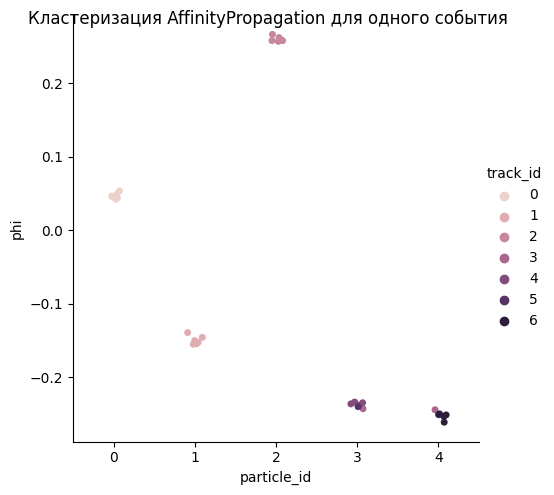

In [116]:
g = sns.catplot(data=selected_event, x='particle_id', y='phi', hue='track_id')
g.fig.suptitle('Кластеризация AffinityPropagation для одного события')

## 5. Получить с помощью trackml_score оценку качества результата трекинга для каждого события

In [98]:
from trackml.score import score_event

trackml_score = []

for i in range(0,100):  #  i - id события

    selected_event = df.loc[df['event_id'] == i]

    trackml_score.append(score_event(selected_event, selected_event))

In [100]:
len(trackml_score)

100

## 6. Построить гистограмму распределения trackml_score событий датасета

Text(0.5, 1.0, 'Гистограмма распределения trackml_score событий датасета')

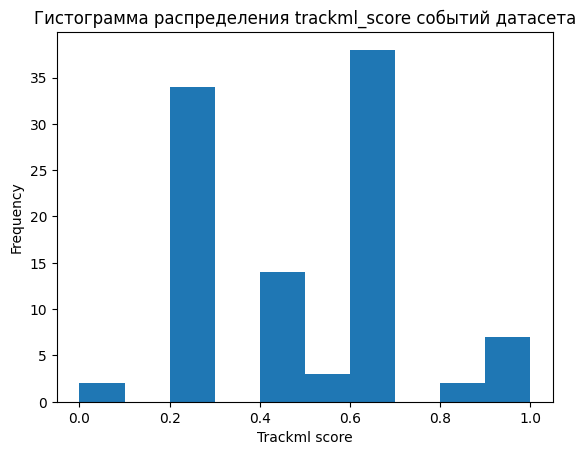

In [114]:
from matplotlib import pyplot as plt

plt.hist(trackml_score, range=(0,1))

plt.xlabel('Trackml score')
plt.ylabel('Frequency')
plt.title('Гистограмма распределения trackml_score событий датасета')